In [1]:
import pandas as pd
#import stockstats as StockDataFrame
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline
pd.set_option('display.max_columns', 500)
from sklearn.metrics import f1_score
from scipy.optimize import least_squares
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

/home/matthew/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load stock data

In [2]:
df = pd.read_csv('largecap.csv')

In [3]:
def middle_of_month(name):
    name['date'] = pd.DatetimeIndex(name['date'])
    stockmiddle = name.loc[:,('date','open')]
    stockmiddle['date'] = pd.DatetimeIndex(stockmiddle['date']) + pd.DateOffset(-14)
    stockmiddle['14 day price'] = stockmiddle['open']
    stockmiddle.set_index('date', drop=False, inplace=True)
    stockmiddle.drop('open', 1, inplace=True)
    stock30 = name.loc[:,('date','open')]
    stock30['date'] = pd.DatetimeIndex(stock30['date']) + pd.DateOffset(-28)
    stock30['28 day price'] = stock30['open']
    stock30.set_index('date', drop=False, inplace=True)
    stock30.drop('open', 1, inplace=True)
    stock60 = name.loc[:,('date','open')]
    stock60['date'] = pd.DatetimeIndex(stock60['date']) + pd.DateOffset(-63)
    stock60['63 day price'] = stock60['open']
    stock60.set_index('date', drop=False, inplace=True)
    stock60.drop('open', 1, inplace=True)
    name.set_index('date', drop=False, inplace=True)
    output = pd.merge(name,stockmiddle, left_on='date', right_on='date')
    output = pd.merge(output,stock30, left_on='date', right_on='date')
    output = pd.merge(output,stock60, left_on='date', right_on='date')
    output['2 week gain'] = (output['14 day price'] / output['open']) - 1
    output['4 week gain'] = (output['28 day price'] / output['open']) - 1
    output['7 week gain'] = (output['63 day price'] / output['open']) - 1
    output.set_index('date', drop=False, inplace=True)
    return output

In [4]:
def derivative(data):
    data = data.iloc[1:]
    data['Category: All categories'] = data['Category: All categories'].astype(float)
    data['derivative'] = data['Category: All categories'].diff(periods = 1)
    data.index = [datetime.strptime(date, '%Y-%m-%d').date() for date in data.index]
    data.index = data.index + pd.DateOffset(-2)
    return data
    
def stock(stock,datastock):
    stockdata = df[df['ticker'] == str(stock)]
    datastock = middle_of_month(stockdata)
    return datastock
    
def mergefunction(stock,derivative):
    stock = stock.iloc[1:]
    derivative = pd.merge(stock, derivative,
                          left_index = True,
                          right_index = True,
                          how='inner')
    return stock

In [5]:
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,marketopen,marketclose,marketgain,volatility,daily_change,dailyrate
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,29.367758,32.272262,25.817810,28.399591,44739900.0,2.035665e+09,1.968556e+09,-67109850.0,0.222222,-1.50,-0.032967
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,27.714581,27.753307,25.694399,26.062292,10897100.0,4.679215e+08,4.400249e+08,-27896576.0,0.077044,-2.56,-0.059618
2,A,1999-12-29,63.00,79.06,62.94,72.00,7524000.0,0.0,1.0,40.668650,51.035928,40.629918,46.478457,7524000.0,4.740120e+08,5.417280e+08,67716000.0,0.227042,9.00,0.142857
3,A,2000-05-12,84.00,98.00,82.25,90.56,9703800.0,0.0,1.0,54.225854,63.263496,53.096148,58.460635,9703800.0,8.151192e+08,8.787761e+08,63656928.0,0.174757,6.56,0.078095
4,A,2000-05-17,83.25,83.75,76.81,78.00,8906100.0,0.0,1.0,53.739464,54.062223,49.582321,50.350489,8906100.0,7.414328e+08,6.946758e+08,-46757025.0,0.086447,-5.25,-0.063063


In [6]:
df.shape

(440325, 20)

In [7]:
tickers = df['ticker'].value_counts()

In [8]:
stocks = pd.DataFrame()
def valuepredictor(df):
    for value in df['ticker']:
        teststock = df[df['ticker'] == value]
        teststock = middle_of_month(teststock)
        value = teststock
        return value
    stocks = pd.merge([value, stocks])

In [9]:
companies=['MCD','YUM','YUMC','QSR','CMG','DRI','DPZ','DNKN','CBRL','WEN','TXRH','JACK','PFGC','PLAY','CAKE','BWLD','BLMN','EAT','ARCO','BOBE','SONC']

In [10]:
teststock = df[df['ticker'].isin(companies)]
teststock = middle_of_month(teststock)
stocks = teststock

/home/matthew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
stocks.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,marketopen,marketclose,marketgain,volatility,daily_change,dailyrate,14 day price,28 day price,63 day price,2 week gain,4 week gain,7 week gain
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-12-19,CAKE,2007-12-19,21.84,24.75,21.22,24.54,9184300.0,0.0,1.0,20.312099,23.018518,19.735473,22.823210,9184300.0,200585112.0,225382722.0,24797610.0,0.153578,2.70,0.123626,58.5,53.42,55.07,1.678571,1.445971,1.521520
2007-12-19,CAKE,2007-12-19,21.84,24.75,21.22,24.54,9184300.0,0.0,1.0,20.312099,23.018518,19.735473,22.823210,9184300.0,200585112.0,225382722.0,24797610.0,0.153578,2.70,0.123626,58.5,34.45,55.07,1.678571,0.577381,1.521520
2007-12-19,DRI,2007-12-19,31.65,31.85,28.30,28.60,13797700.0,0.0,1.0,20.491878,20.621369,18.322912,18.517147,13797700.0,436697205.0,394614220.0,-42082985.0,0.118038,-3.05,-0.096367,58.5,53.42,55.07,0.848341,0.687836,0.739968
2007-12-19,DRI,2007-12-19,31.65,31.85,28.30,28.60,13797700.0,0.0,1.0,20.491878,20.621369,18.322912,18.517147,13797700.0,436697205.0,394614220.0,-42082985.0,0.118038,-3.05,-0.096367,58.5,34.45,55.07,0.848341,0.088468,0.739968
2009-04-24,CAKE,2009-04-24,16.85,18.11,16.52,17.81,8721300.0,0.0,1.0,15.671193,16.843045,15.364280,16.564033,8721300.0,146953905.0,155326353.0,8372448.0,0.091828,0.96,0.056973,55.1,55.92,57.39,2.270030,2.318694,2.405935


In [12]:
stocks['ticker'].value_counts()

MCD     924
WEN     377
YUM     134
DRI      19
EAT      15
DNKN     11
CAKE      6
Name: ticker, dtype: int64

# Load fundamental data

In [13]:
stocks.isnull().sum()

ticker          0
date            0
open            0
high            0
low             0
close           0
volume          0
ex-dividend     0
split_ratio     0
adj_open        0
adj_high        0
adj_low         0
adj_close       0
adj_volume      0
marketopen      0
marketclose     0
marketgain      0
volatility      0
daily_change    0
dailyrate       0
14 day price    0
28 day price    0
63 day price    0
2 week gain     0
4 week gain     0
7 week gain     0
dtype: int64

In [14]:
stocks = stocks.dropna()

In [15]:
stocks.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,marketopen,marketclose,marketgain,volatility,daily_change,dailyrate,14 day price,28 day price,63 day price,2 week gain,4 week gain,7 week gain
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-12-19,CAKE,2007-12-19,21.84,24.75,21.22,24.54,9184300.0,0.0,1.0,20.312099,23.018518,19.735473,22.823210,9184300.0,200585112.0,225382722.0,24797610.0,0.153578,2.70,0.123626,58.5,53.42,55.07,1.678571,1.445971,1.521520
2007-12-19,CAKE,2007-12-19,21.84,24.75,21.22,24.54,9184300.0,0.0,1.0,20.312099,23.018518,19.735473,22.823210,9184300.0,200585112.0,225382722.0,24797610.0,0.153578,2.70,0.123626,58.5,34.45,55.07,1.678571,0.577381,1.521520
2007-12-19,DRI,2007-12-19,31.65,31.85,28.30,28.60,13797700.0,0.0,1.0,20.491878,20.621369,18.322912,18.517147,13797700.0,436697205.0,394614220.0,-42082985.0,0.118038,-3.05,-0.096367,58.5,53.42,55.07,0.848341,0.687836,0.739968
2007-12-19,DRI,2007-12-19,31.65,31.85,28.30,28.60,13797700.0,0.0,1.0,20.491878,20.621369,18.322912,18.517147,13797700.0,436697205.0,394614220.0,-42082985.0,0.118038,-3.05,-0.096367,58.5,34.45,55.07,0.848341,0.088468,0.739968
2009-04-24,CAKE,2009-04-24,16.85,18.11,16.52,17.81,8721300.0,0.0,1.0,15.671193,16.843045,15.364280,16.564033,8721300.0,146953905.0,155326353.0,8372448.0,0.091828,0.96,0.056973,55.1,55.92,57.39,2.270030,2.318694,2.405935


In [16]:
X = stocks.drop(['7 week gain','ticker','63 day price','date'], 1)
y = stocks['7 week gain']
reg_scores = cross_val_score(LinearRegression(), X, y, cv=4)
print reg_scores, np.mean(reg_scores)

[ 0.55969766  0.54567082  0.47755722  0.4979581 ] 0.520220949539


In [17]:
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.1607, 'adj_low'), (0.1496, 'adj_high'), (0.1491, 'marketclose'), (0.0776, 'adj_close'), (0.076, 'open'), (0.0753, 'marketopen'), (0.0745, 'high'), (0.0419, '2 week gain'), (0.0328, '14 day price'), (0.0262, '4 week gain'), (0.0246, 'volatility'), (0.0244, '28 day price'), (0.0206, 'low'), (0.014, 'adj_open'), (0.0127, 'close'), (0.0116, 'dailyrate'), (0.0107, 'marketgain'), (0.0097, 'volume'), (0.0045, 'adj_volume'), (0.0036, 'daily_change'), (0.0, 'split_ratio'), (0.0, 'ex-dividend')]


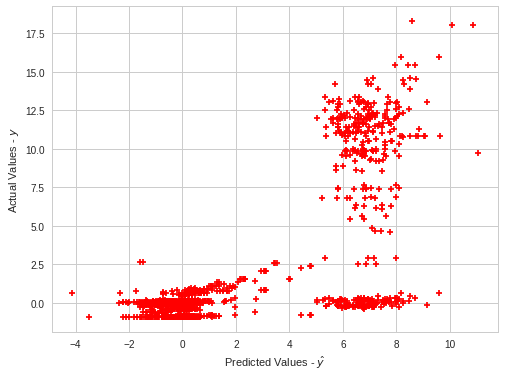

MSE: 8.33471543148


In [18]:
# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            7 week gain   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     100.4
Date:                Fri, 23 Jun 2017   Prob (F-statistic):          3.10e-240
Time:                        07:58:10   Log-Likelihood:                -3684.0
No. Observations:                1486   AIC:                             7406.
Df Residuals:                    1467   BIC:                             7507.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
open            -0.5335      1.889     -0.282      0.778      -4.239       3.172
high             0.8129      2.178      0.373      0.709      -3.460       5.085
low              0.2588      1.953      0.132      0.895      -3.573       4.091
close           -0.8795      1.876     -0.469      0.639      -4.560       2.801
volume        -2.34e-08   1.71e-08     -1.367      0.172    -5.7e-08    1.02e-08
ex-dividend     -0.2823      0.978     -0.289      0.773      -2.200       1.636
split_ratio      5.8710      0.458     12.827      0.000       4.973       6.769
adj_open         0.4529      2.919      0.155      0.877      -5.274       6.179
adj_high        -1.7165      2.879     -0.596      0.551      -7.365       3.932
adj_low          0.4232      2.589      0.163      0.870      -4.656       5.502
adj_close        1.1592      2.777      0.417      0.676      -4.288       6.606
adj_volume   -4.016e-08   1.85e-08     -2.167      0.030   -7.65e-08   -3.81e-09
marketopen    7.666e-07   5.91e-07      1.297      0.195   -3.93e-07    1.93e-06
marketclose  -7.649e-07   5.91e-07     -1.294      0.196   -1.92e-06    3.95e-07
marketgain    7.774e-07   5.89e-07      1.320      0.187   -3.78e-07    1.93e-06
volatility      15.4613      3.769      4.102      0.000       8.068      22.855
daily_change    -0.3460      0.736     -0.470      0.638      -1.789       1.097
dailyrate        1.1999      3.519      0.341      0.733      -5.702       8.102
14 day price    -0.0062      0.004     -1.569      0.117      -0.014       0.002
28 day price    -0.0080      0.004     -2.153      0.031      -0.015      -0.001
2 week gain      0.1167      0.034      3.408      0.001       0.050       0.184
4 week gain      0.1143      0.032      3.574      0.000       0.052       0.177
==============================================================================
Omnibus:                       93.425   Durbin-Watson:                   2.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.601
Skew:                          -0.363   Prob(JB):                     1.69e-49
Kurtosis:                       4.761   Cond. No.                     3.39e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.64e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i] * y_hat[i] > 0:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i] > 0 and y_actual[i] < 0:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i] * y_hat[i] < 0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i] < 0 and y_actual[i] > 0:
           FN += 1
    return(TP, FP, TN, FN)

In [21]:
perf_measure(predictions, y)

(1001, 196, 485, 289)

In [23]:
(1001+485) *100/ (1001+196+485+289)

75